Epoch 0, Loss 0.2439
Epoch 200, Loss 0.1673
Epoch 400, Loss 0.0733
Epoch 600, Loss 0.0382
Epoch 800, Loss 0.0232
Epoch 1000, Loss 0.0155
Epoch 1200, Loss 0.0111
Epoch 1400, Loss 0.0084
Epoch 1600, Loss 0.0066
Epoch 1800, Loss 0.0054


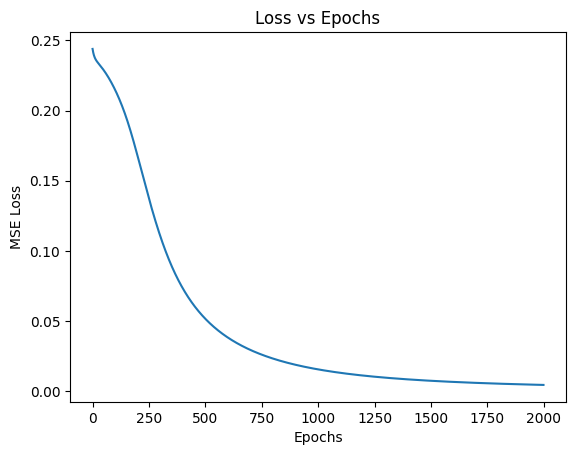

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

X = np.array([[0],[1],[2],[3],[4]], dtype=float)
y = np.array([[0],[0],[1],[1],[1]], dtype=float)

np.random.seed(42)

W1 = np.random.randn(1, 4) * 0.1
b1 = np.zeros((1, 4))

W2 = np.random.randn(4, 1) * 0.1
b2 = np.zeros((1, 1))

lr = 0.1
epochs = 2000
losses = []

for epoch in range(epochs):

    # Forward
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)

    loss = np.mean((y - y_hat)**2)
    losses.append(loss)

    dL_dz2 = (y_hat - y) * sigmoid_derivative(y_hat)
    dW2 = np.dot(a1.T, dL_dz2)
    db2 = np.sum(dL_dz2, axis=0, keepdims=True)

    dL_dz1 = np.dot(dL_dz2, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dL_dz1)
    db1 = np.sum(dL_dz1, axis=0, keepdims=True)

    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss {loss:.4f}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss vs Epochs")
plt.show()
